# IPyWIDGETS

- JAPR
- 06/03/24

In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import interact, interactive

import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
text = "IPy widgets are python objects that interact with the browser. They can help you enhance the interactivity of jupyter notebooks."

# Create a text input widget and button
search_box = widgets.Text(placeholder="Enter important word")
highlight_button = widgets.Button(description="Convince audience")
font_size_slider = widgets.IntSlider(min=11, max=72, value=12, description="Font size")
output = widgets.Output()

def highlight_text(_):
    search_term = re.escape(search_box.value)  # Escape special characters
    highlighted_text = re.sub(f'({search_term})', r'<mark>\1</mark>', text, flags=re.IGNORECASE) if search_term else text
    
    with output:
        output.clear_output()
        display(HTML(f"<p style='font-size:{font_size_slider.value}px'>{highlighted_text}</p>"))

        

# Ensure the text is always visible
with output:
    display(HTML(f"<p>{text}</p>"))

highlight_button.on_click(highlight_text)

In [4]:
display(output)

Output()

In [5]:
display(search_box, font_size_slider, highlight_button)

Text(value='', placeholder='Enter important word')

IntSlider(value=20, description='Font size', max=72, min=11)

Button(description='Convince audience', style=ButtonStyle())

### What just happened?

Jupyter notebooks run on two engines: a `python` kernel and a `html`7`javascript` frontend.

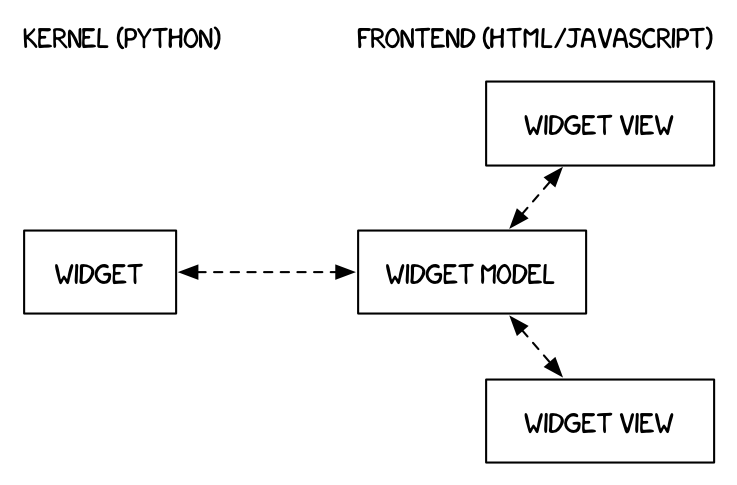

In the previous example, I have used 4 _widgets_:
- Text input
- Integer slider
- Button
- Output


### Mostly a communication tool

Widgets require minimal additions to an existing jupyter notebook and will transform it into a better communication tool. This is particularly relevant for:

- Exploration
- Education
- Reporting

## Anatomy of a widget

As mentioned, in this context, widgets are python obects. As such, you need to install the widget library:

    pip install ipywidgets

There are different categories:
- Numeric, Boolean, Selection, String, Button, Pickers, ...

Widgets can be combined in complex layouts.

The library is __very__ well documented [here](https://ipywidgets.readthedocs.io/en/7.x/examples/Widget%20Basics.html).

### Example

In [ ]:
# You call widgets as any other python object
from ipywidgets import IntSlider, IntText

w1 = IntSlider()  # min=10, max=25, description="Simple slider")
w2 = IntText()

In [11]:
dir(w1)

['__annotations__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_active_widgets',
 '_add_notifiers',
 '_all_trait_default_generators',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_control_comm',
 '_cross_validation_lock',
 '_default_keys',
 '_descriptors',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_get_trait_default_generator',
 '_handle_control_comm_msg',
 '_handle_custom_msg',
 '_handle_msg',
 '_holding_sync',
 '_instance_inits',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_nam

In [8]:
w1

IntSlider(value=0)

You can either place the widget at the bottom of the cell, or be more specific using the `display` function.

In [ ]:
from IPython.display import display

display(w1)

IntSlider(value=0)

Something else

In [9]:
display(w1, w2)

IntSlider(value=0)

IntText(value=0)

The state might change but notice that, of course, we might need to rerun dependent cells.

In [10]:
w1.value, w2.value

(53, 32)

Widgets will store their state, typically in a `value` attribute.

### Linking widgets

You might want to represent the same result in different ways or update existing attributes.

In that case you can _link_ widgets.

- Only valid for similar widgets (to showcase the same value two different ways).
- Need to be aware of the widgets' _traits_

In [14]:
w3 = widgets.Text(description="w1 description")
mylink = widgets.jslink((w1, 'description'), (w3, 'value'))
# mylink.unlink()

w3

Text(value='', description='w1 description')

## Doing something with widgets

Widgets offer flexibility at a very little cost.

In [38]:
def plot(freq):
    x = np.linspace(0, 2*np.pi)
    y = np.sin(x * freq)
    plt.plot(x, y)

freq_selector = widgets.FloatSlider(value=2, min=0.1, max=5, step=0.05, description="Freq.")

interact(plot, freq = freq_selector);

interactive(children=(FloatSlider(value=2.0, description='Freq.', max=5.0, min=0.1, step=0.05), Output()), _do…

In [42]:
phase_selector = widgets.FloatText(description="Phase")
color_picker = widgets.ColorPicker(
    concise=False,
    description='Color',
    value='blue',
    disabled=False
)

@interact(freq = freq_selector, phase = phase_selector, color = color_picker)
def plot(freq, phase, color):
    x = np.linspace(0, 2*np.pi)
    y = np.sin(phase + x * freq)
    plt.plot(x, y, c=color)

interactive(children=(FloatSlider(value=5.0, description='Freq.', max=5.0, min=0.1, step=0.05), FloatText(valu…

Using `interact` displays information right away and you might be interested in storing the results of the interaction.

In [46]:
def plot(freq, phase, color):
    x = np.linspace(0, 2*np.pi)
    y = np.sin(phase + x * freq)
    plt.plot(x, y, c=color)

w5 = interactive(plot, freq=freq_selector, phase=phase_selector, color=color_picker)

In [47]:
w5.children

(FloatSlider(value=5.0, description='Freq.', max=5.0, min=0.1, step=0.05),
 FloatText(value=0.0, description='Phase'),
 ColorPicker(value='blue', description='Color'),
 Output())

w5 is a collection of widgets.

## Shortcuts

In [ ]:
w6 = interactive(plot, {'manual': True}, freq=freq_selector, phase=phase_selector, color=color_picker)
display(w6)

interactive(children=(FloatSlider(value=5.0, description='Freq.', max=5.0, min=0.1, step=0.05), FloatText(valu…

This has introduced a new type of widget that corresponds to an event.

In [49]:
w6.children

(FloatSlider(value=2.900000000000001, description='Freq.', max=5.0, min=0.1, step=0.05),
 FloatText(value=2.0, description='Phase'),
 ColorPicker(value='#221334', description='Color'),
 Button(description='Run Interact', style=ButtonStyle()),
 Output())

## Events

Buttons do not have a state.

In [50]:
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [51]:
out = widgets.Output(layout={'border': '1px solid black'})
out

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

In [57]:
with out:
    for i in range(10):
        print(i, 'Hello world!')

In [56]:
with out:
    display(widgets.IntSlider())

In [58]:
out = widgets.Output(layout={'border': '1px solid black'})
out.append_stdout('Output appended with append_stdout')
out

out.clear_output()